# Lista de Exercícios - Aprendizagem de Máquina

Aluno: Bruno Cardoso Dantas

### Projeto

Acesse o kaggle.com e escolha uma base de dados³ para classificação ou regressão. Em seguida, avalie duas técnicas de aprendizagem de máquina para resolução do problema proposto. Por fim, em sua apresentação, comente os seguintes pontos :

*   (a) Qual a base de dados escolhida? Qual o significado de cada atributo? Qual o objetivo do problema?

*   (b) Qual pré-processamento foi realizado nos dados? Porquê?

*   (c) Como os dados foram divididos para o experimento?

*   (d) Quais métodos de aprendizagem de máquina foram utilizados? Quais os resultados obtidos?

*   (e) Quais os parâmetros mais importantes de cada método de aprendizagem utilizado? Quais efeitos nos resultados podem ser observados com ajustes nos valores desses parâmetros?

*   (f) O que acontece com os resultados ao realizar novos experimentos diminuindo o conjunto de treinamento e aumentando o conjunto de testes?

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/UFPE - Ciência de Dados/APRENDIZAGEM DE MÁQUINA/Dataset/archive/

!ls

/content/drive/MyDrive/UFPE - Ciência de Dados/APRENDIZAGEM DE MÁQUINA/Dataset/archive
'Ecommerce Customers.csv'


In [ ]:
ecommerce = pd.read_csv('./Ecommerce Customers.csv')

In [ ]:
# Base de dados

ecommerce.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


### Preparação dos dados para o treinamento do modelo

In [ ]:
# Selecionando as colunas numéricas para usar como características
X = ecommerce[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

# Usando 'Yearly Amount Spent' como a variável alvo
y = ecommerce['Yearly Amount Spent']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Treinamento e avaliação do modelo de regressão linear

In [ ]:
# Criando e treinando o modelo de regressão linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
lr_predictions = lr_model.predict(X_test)

# Avaliando o modelo
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f'MSE para o modelo de Regressão Linear: {lr_mse}')

MSE para o modelo de Regressão Linear: 109.8637411839399


### Treinamento e avaliação do modelo de árvore de decisão

In [ ]:
# Criando e treinando o modelo de árvore de decisão
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
dt_predictions = dt_model.predict(X_test)

# Avaliando o modelo
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f'MSE para o modelo de Árvore de Decisão: {dt_mse}')

MSE para o modelo de Árvore de Decisão: 686.5771641745991


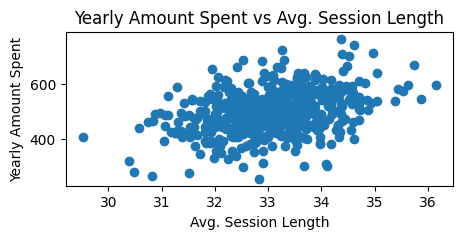

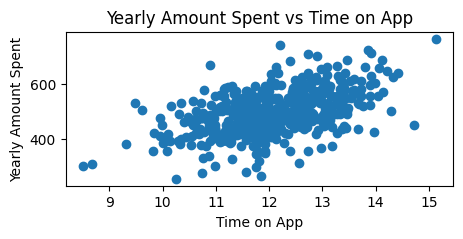

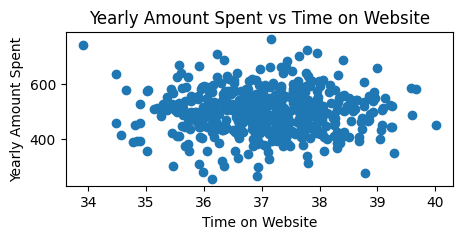

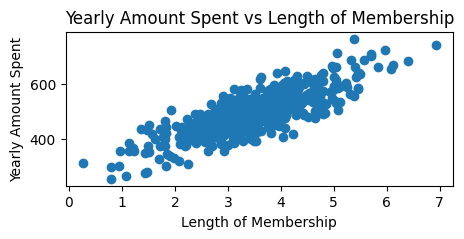

In [ ]:
# Lista das características
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']

# Criando um gráfico de dispersão para cada característica
for feature in features:
    plt.figure(figsize=(5,2))
    plt.scatter(ecommerce[feature], ecommerce['Yearly Amount Spent'])
    plt.xlabel(feature)
    plt.ylabel('Yearly Amount Spent')
    plt.title(f'Yearly Amount Spent vs {feature}')
    plt.show()